In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pylab as pl
import datetime as dt
from pandas.plotting import scatter_matrix
!pip install yfinance
import yfinance as yf
%matplotlib inline

In [14]:
netflix_stock = pd.read_csv("yahoo_netflix_ver2.csv")
#netflix_stock = netflix_stock.reset_index(drop=True)
netflix_stock.drop(columns=netflix_stock.columns[0], axis=1, inplace=True)
netflix_stock = netflix_stock.drop(columns = ['Date'], axis=1)
netflix_stock.rename(columns = {'Close*':'Close', 'Adj Close**':'Adj Close', 'Date2':'Date'}, inplace = True)
netflix_stock = netflix_stock[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
netflix_stock = netflix_stock.sort_values(by='Date')
#netflix_stock['Date'] = pd.to_datetime(netflix_stock['Date'], format='%Y-%m-%d')
netflix_stock.set_index('Date', inplace = True)
netflix_stock.index = pd.to_datetime(netflix_stock.index).date

In [15]:
# (0) Get some insights into data
netflix_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,522.00000,522.000000,522.000000,522.000000,522.000000,5.220000e+02
mean,232.65705,242.192529,223.865498,233.224540,233.224540,6.280312e+07
std,176.56994,182.915300,170.397475,176.373934,176.373934,5.230525e+07
min,9.19000,10.030000,8.200000,9.940000,9.940000,8.852500e+06
25%,79.75000,82.180000,78.892500,80.240000,80.240000,2.863688e+07
50%,184.49500,190.230000,176.180000,186.585000,186.585000,4.822130e+07
75%,359.71500,373.290000,348.577500,360.795000,360.795000,7.989648e+07
max,689.06000,700.990000,671.490000,690.310000,690.310000,4.072593e+08


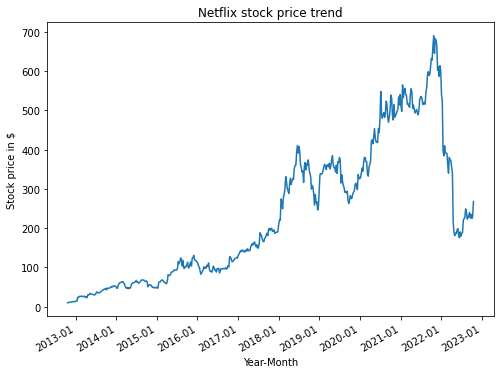

In [16]:
# Change the default figure size
plt.rcParams['figure.figsize'] = [8, 6]

# (1) Plot stock quotes
#plt.plot(netflix_stock['Date'], netflix_stock['Close'], label='Stock price')
ax = netflix_stock['Close'].plot(title = 'Netflix stock price trend')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()
plt.xlabel('Year-Month')
plt.ylabel('Stock price in $')
plt.show()

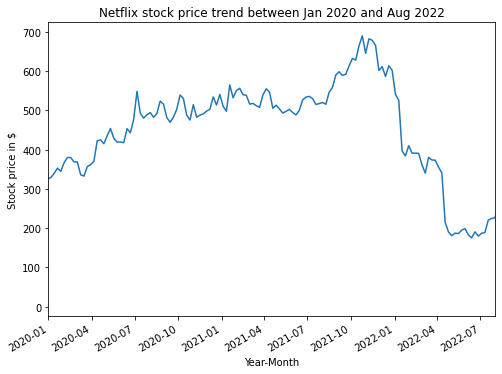

In [17]:
# (2) Plot stock quotes between 01/2020 and 08/2022
# Set X range. Using left and right variables makes it easy to change the range.
left = dt.date(2020, 1, 1)
right = dt.date(2022, 8, 1)
ax = netflix_stock['Close'].plot(title = 'Netflix stock price trend between Jan 2020 and Aug 2022')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.ylabel('Stock price in $')
plt.xlabel('Year-Month')
plt.gcf().autofmt_xdate()
plt.gca().set_xbound(left, right)
plt.show()

Text(0.5, 0.98, 'Netflix stock price and volume history in the last decade')

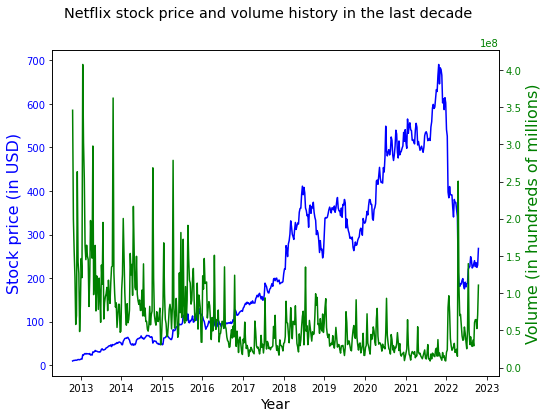

In [50]:
# (3) Stock price and trading volume comparison chart
netflix_stock['MarketCap'] = netflix_stock['Close']*netflix_stock['Volume']

#define subplots
fig,ax = plt.subplots()

#add first line to plot
ax.plot(netflix_stock.index, netflix_stock['Close'], color='blue')

#add x-axis label
ax.set_xlabel('Year', fontsize=14)

#add y-axis label
ax.set_ylabel('Stock price (in USD)', color='blue', fontsize=16)
ax.tick_params(axis='y', labelcolor='blue')

#define second y-axis that shares x-axis with current plot
ax2 = ax.twinx()

#add second line to plot
ax2.plot(netflix_stock.index, netflix_stock['Volume'], color='green')

#add second y-axis label
ax2.set_ylabel('Volume (in hundreds of millions)', color='green', fontsize=16)
ax2.tick_params(axis='y', labelcolor='green')

# add a title
pl.suptitle('Netflix stock price and volume history in the last decade', fontsize=14.4)

Text(0.5, 0.98, 'Histogram of stock price percent changes from previous week')

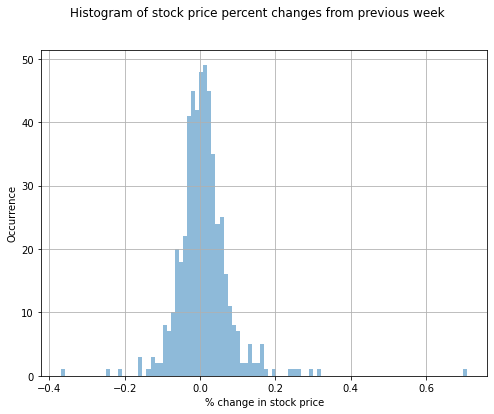

In [194]:
# (4) Stock price changes from previous week
netflix_stock['Volitality'] = (netflix_stock['Close']/netflix_stock['Close'].shift(1)) - 1
netflix_stock['Volitality'].hist(bins = 100, alpha = 0.5)
plt.xlabel('% change in stock price')
plt.ylabel('Occurrence')
pl.suptitle('Histogram of stock price percent changes from previous week')